<a href="https://colab.research.google.com/github/RajeswariSahu/Data-Science-Projects/blob/main/PRCP_1017_AutoPricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project team ID is - PTID-CDS-NOV-23-1703
# PRCP-1017-AutoPricePred

In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
data=pd.read_csv('auto_imports.csv')
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
pd.set_option('display.max_columns',None)
data.head(2)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [ ]:
data.rename(columns={'3':'symbolic'},inplace=True)

In [ ]:
data.rename(columns={'?':'normalized-losses'},inplace=True)

In [ ]:
data.rename(columns={'alfa-romero':'make'},inplace=True)

In [ ]:
data.rename(columns={'gas':'fuel-type'},inplace=True)

In [ ]:
data.rename(columns={'std':'aspiration'},inplace=True)

In [ ]:
data.rename(columns={'two':'num-of-doors'},inplace=True)

In [ ]:
data.rename(columns={'convertible':'body-style'},inplace=True)

In [ ]:
data.rename(columns={'rwd':'drive-wheels'},inplace=True)

In [ ]:
data.rename(columns={'front':'engine-location'},inplace=True)

In [ ]:
data.rename(columns={'88.60':'wheel-base'},inplace=True)

In [ ]:
data.rename(columns={'168.80':'length'},inplace=True)

In [ ]:
data.rename(columns={'64.10':'width'},inplace=True)

In [ ]:
data.rename(columns={'48.80':'height'},inplace=True)

In [ ]:
data.rename(columns={'2548':'curb-weight'},inplace=True)

In [ ]:
data.rename(columns={'dohc':'engine-type'},inplace=True)

In [ ]:
data.rename(columns={'four':'num-of-cylinders'},inplace=True)

In [ ]:
data.rename(columns={'130':'engine-size'},inplace=True)

In [ ]:
data.rename(columns={'mpfi':'fuel-system'},inplace=True)

In [ ]:
data.rename(columns={'3.47':'bore'},inplace=True)

In [ ]:
data.rename(columns={'2.68':'stroke'},inplace=True)

In [ ]:
data.rename(columns={'9.00':'compression-ratio'},inplace=True)

In [ ]:
data.rename(columns={'111':'horsepower'},inplace=True)

In [ ]:
data.rename(columns={'5000':'peak-rpm'},inplace=True)

In [ ]:
data.rename(columns={'21':'city-mpg'},inplace=True)

In [ ]:
data.rename(columns={'27':'highway'},inplace=True)

In [ ]:
data.rename(columns={'13495':'price'},inplace=True)

In [ ]:
data.head(2)

,symbolic,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


# Domain Analysis

1. symbolic : Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

2. normalized-losses : The second attribute, “normalized-losses,” is the relative average loss payment per insured vehicle year. This figure is normalised for all vehicles within a given size category (two-door, small, station wagons, sports/specialty, etc…) and represents the average loss per vehicle per year.

3. make : The make of a car refers to the company or brand that manufactures the vehicle. For example, brands like Toyota, Ford, Honda, and Chevrolet are considered makes and are usually associated with the company's reputation, image, and overall quality of its cars.

4. fuel-type :

5. aspiration : Engine aspiration is the cause of the air's presence, making it essential for your engine. The “inhalation” of the air enters the combustion chamber, where it mixes with the fuel. The air and fuel combination ignites from a spark supplied by the spark plugs and creates the force needed to power the vehicle.

6. num-of-doors :       

7. body-style : Body Style means a level of commonality in vehicle configurations as defined by number of doors and roof treatment (e.g., sedan, convertible, fast- back, hatchback) and number of seats (i.e. front seat, second, or third seat) re­quiring seat belts pursuant to National Highway Traffic Safety Administration safety regulations. Station wagons and light trucks are identified as car lines.


*   convertible - In general terms, a cabriolet or convertible (the terms are interchangeable) is a car with a roof that can be opened.

*   hatchback-It is a body style,designed with a rear door that swings upward to provide access to a cargo area.Hatchbacks may feature fold down second row seating, where the interior can be flexibly reconfigured to prioritize passenger vs. cargo volume.This does not apply to MPVs,4*4s or vans.

*   sedan-A sedan or saloon is a passenger car in a three-box configuration with separate compartments for an engine, passengers, and cargo.
*   wagon-A wagon has a low floor that hangs close to the ground, with its length that is greater than its height, and a long roofline that falls past its rear doors.

*  hardtop-The pillarless hardtop (abbreviated as "hardtop") is a post-World War II car body designed with no center or B-pillar or glass frames.

8. drive-wheels-A drive wheel is a wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road, causing the vehicle to move.

*  4wd-As pointed out before, four-wheel drive (4WD) is an automobile drivetrain system that directly powers all four wheels
*  fwd-A car with front-wheel drive (FWD) means that the engine and gearbox are connected directly to the front wheels only. The power of the engine is transferred to the front wheels, which 'pull' the car along. This is the most common system used in modern cars, as it's cheaper to build.

*  rwd-Rear wheel drive (RWD) means that engine power is delivered to the rear wheels which in turn push the car forward. The front wheels do not receive any power. Since the weight of a RWD vehicle is more evenly spread than many front wheel drive vehicles, there's a better balance of weight.

9. engine-location : By placing the engine in the middle of the car, engineers balance the front and rear weight and are able to maintain equal traction in all four wheels. This makes them incredibly stable in the corners.

*  front-A front-engine, front-wheel-drive (FF) layout places both the engine and the driven wheels at the front of the vehicle. This configuration is commonly found in many modern cars and offers benefits such as efficient use of space, good traction in slippery conditions, and predictable handling.
*  rear-In automobile design, a rear-engine design layout places the engine at the rear of the vehicle.
10. wheel-base : Wheelbase is the distance between the centers of the front and rear tires on a vehicle.
11. length : The length of the car is the maximum longitudinal dimension of the car.
12. width : The width of the vehicle is the distance between two vertical planes parallel to the longitudinal median plane of the vehicle and touching both sides of the body, including the door handles.
13. height : The height of a car is the vertical distance between the ground and the highest point on the vehicle.
14. curb-weight : Curb weight is the weight of the vehicle, including a full tank of fuel and all standard equipment.
15. engine-type : engine type means a power source with defined characteristics such as fuel utilized, number of cylinders, displacement, and net brake horsepower.

*  dohc-Dual Overhead Camshaft (DOHC)
They are higher-performance engines with two camshafts operating four valves per cylinder. There is one separate camshaft for intake and exhaust valves. Manufacturers position it above the valves for more accurate actuation.
*  ohcv-An overhead camshaft (OHC) engine is a piston engine in which the camshaft is located in the cylinder head above the combustion chamber.

*  ohc-An overhead camshaft (OHC) engine is a piston engine in which the camshaft is located in the cylinder head above the combustion chamber
*  1-This is also known as displacement, and the measurement is in cubic centimetres (cc). For instance, a two-cylinder 1,000cc engine has the capacity to displace one litre of fuel and air - 500cc from each cylinder. This gives you a 1.0-litre engine.

*  rotor-The term "rotor" refers to a rotating part of a machine that transmits mechanical power or interacts with a magnetic field to produce motion or electrical power.
*  ohcf-
16. num-of-cylinders : the more cylinders your engine has, the more power is produced.
17. engine-size : Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre. For example, a car that has a 1390cc engine would be described as a 1.4 litre.
18. fuel-system : The fuel system is made up of the fuel tank, pump, filter and injectors or carburetor, and is responsible for delivering fuel to the engine as needed.

*  mpfi-A Multi-Point Fuel Injection (MPFI) engine uses an advanced electronic fuel injection system to deliver precise amounts of fuel directly into each engine's cylinder.
*  2bbl-A 2-barrel carburetor has two separate chambers, or bores, through which air and fuel flow. Each barrel has its own throttle valve, which regulates the amount of air and fuel that enters the engine by opening and closing based on the pressure the driver exerts on the gas pedal.

* mfi-multi-port fuel injection (MFI) with a separate fuel injector for each cylinder. This system mixes the fuel and air together right in the intake port for eachengine cylinder just ahead of the intake valve.
*  1bbl(single barrel carburetor)-The simplest carburetors are “single barrel,” meaning they have just one venturi operating.

* spfi-Sequential fuel injection, also called sequential port fuel injection (SPFI) or timed injection, is a type of multiport injection.
* 4bbl-A four-barrel carburetor has two primary and two secondary barrels.

* idi-The IDI system has a small swirl chamber above the cylinder, where the fuel is injected, there's also a glow plug in the chamber needed to help start the engine.
* spdi-
19. bore-An engine's bore is the diameter of each cylinder.bore is the diameter of the circular opening at its end.
20. stroke-The stroke is the distance within the cylinder the piston travels.The stroke, on the other hand, is the depth of the hole.
21. compression-ratio : The compression ratio is defined as the ratio between the volume of the cylinder with the piston in the bottom position, Vbottom (largest volume), and in the top position, Vtop (smallest volume). The higher this ratio, the greater will be the power output from a given engine.
22. horsepower : Horsepower refers to the power an engine produces.
23. peak-rpm : RPM stands for revolutions per minute, and it's used as a measure of how fast any machine is operating at a given time. In cars, rpm measures how many times the engine's crankshaft makes one full rotation every minute, and along with it, how many times each piston goes up and down in its cylinder.

*  For most petrol vehicles, full power (also referred to as 'peak power') will be found around 4,000RPM and peak power in a diesel is often around 2,000RPM.

24. city-mpg : It stands for Miles Per Gallon. MPG numbers tells us how many miles a car can go on a gallon of fuel. A car listed as getting 45.6mpg can go 45.6 miles on a gallon of fuel. A car that can do 99.9mpg can go 99.9 miles on a gallon of fuel.

*  city MPG: the score a car will get on average in city conditions, with stopping and starting at lower speeds
25. highway : A highway is a main road, especially one that connects towns or cities mainly in US.
26. price : Price of specific model of a car. Here price is the target variable.












# Basic checks

In [ ]:
data.shape    # check no.of rows and columns

(200, 26)

In [ ]:
data.columns     # checks name of all columns

Index(['symbolic', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway',
       'price'],
      dtype='object')

In [ ]:
data.head()    # show first five rows

,symbolic,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
data.tail()    # show last five rows

,symbolic,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway,price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
data.dtypes     # check datatype of all columns

symbolic               int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway                int64
price                  int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbolic           200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [ ]:
data.describe()    # shows statistical report

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [ ]:
data.describe(include='O')     # shows statistical report of object datatype

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,36,32,180,164,113,94,118,197,145,156,91,23,19,19,36


In [ ]:
data.isnull().sum()    # check number of null value

symbolic             0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway              0
price                0
dtype: int64

In [ ]:
data.duplicated().sum()    # check duplicate values

0

In [ ]:
# check no.of categories and value counts of categorical columns
x=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for i in x:
  print(i,data[i].unique())
  print('**********************')
  print(i, data[i].value_counts())
  print('-----------------------')

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
**********************
make toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64
-----------------------
fuel-type ['gas' 'diesel']
**********************
fuel-type gas       180
diesel     20
Name: fuel-type, dtype: int64
-----------------------
aspiration ['std' 'turbo']
**********************
aspiration std      164
turbo     36
Name: aspiration, dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 70.7 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html('my_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from the sweetviz report

* symbolic :  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.The graph shows that 13% is the chance of risky. 32% is value 0 that means neither risky nor safe. 26% is value 1 and 16% is value 2 which is nearly risky.

* normalized-losses : 91 to 161 dollar is the frequent loss.

*   make : The graph shows that 16% automobile is manufactured by toyota company. 9% is manufactured by nissan and 8% is manufactured by mazda.

*  fuel-type : 90% fuel type what they used in automobile was gas and 10% was diesel.

*  aspiration : std aspiration is 82% and 18% is turbo aspiration.

*  num-of-doors : 56% automobile have four doors and only 42% cars have two doors.

*  body-style : There are five distinct body style.Out of those,47% are sedan,34% are hatchback. 12% are wagon, 4% are hardtop and 2% are convertible.

*  drive-wheels : 59% automobiles are using fwd drive wheel as its cheaper to built.rwd is 37% and 4wd is 4%.

*  engine-location : 98% automobiles have engine in the front and 2% have in the rear.

* wheel-base : 40% automobile wheel base is range from 93-108 mm/cm. 9% are ranging from 109-121 mm/cm.

* length : Nearly 30% automobile have length 157-189 inch. 6% cars length lies between 194-208 inch. rest are lies between 141-157 inch.

* width : 50% automobiles have width range from 63-68 inch.6. 5% have preferred the width range 70-72 inch. 20% are lies between 60-64 inch.

* height : 36% automobile width lies between 51-57 inch. 11.5% are lies between 56-60 inch and 9% are lies between 47-51 inch.

* curb-weight : Nearly 10% automobiles curb weight are ranging from 1918-2580. 4% are rangeing from 3715-4100.Another 4% is rangeing from 1488-1889.

*  engine-type : Most of the vehicle that is 72% automobiles are using ohc type engine.

*  num-of-cylinders : 78% automobiles are useing 4 cylinders. 12% are using 6 cylinders.The graph shows that 4 or 6 cylinders are used in many vehicles.

*  engine-size : Nearly 41% automobiles are using 90-122 cc. 6.5% are using 194-326 cc.18% are using 61-92 cc.

* fuel-system : The graph shows that many automobiles uses mpfi and 2bbl.

*  bore : The diameter of the cylinder of automobiles is ranging from 3.15-3.62 inches.
*  stroke : The depth of inside the cylinder lies between 3.0-3.4 inch.

*  horsepower : Nearly 24% automobile engines produces 68-116 horsepower.


























<Axes: xlabel='compression-ratio', ylabel='count'>

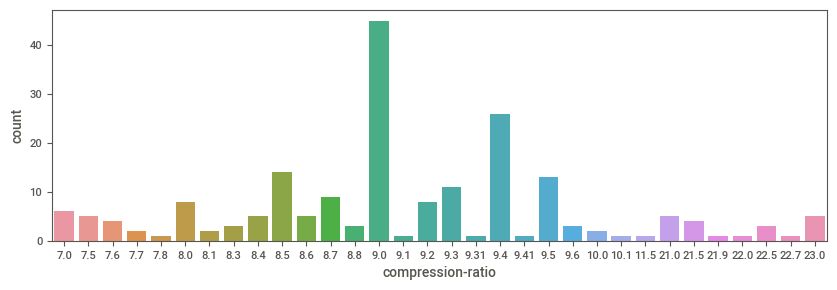

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,x='compression-ratio')

compression-ratio : Many cars are using 9 compression ratio. 8.5, 9.4, 9.5 compression ratio are also used by many cars.

<Axes: xlabel='city-mpg', ylabel='count'>

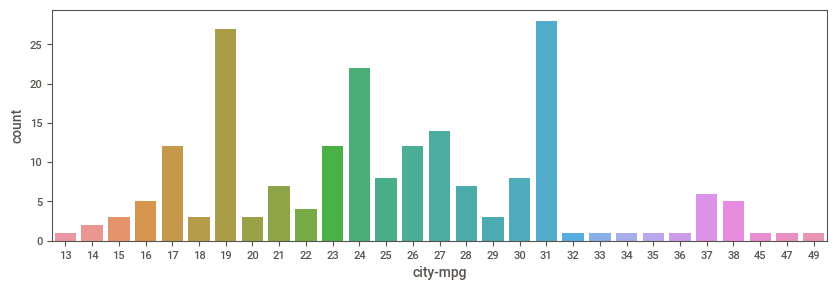

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,x='city-mpg')

city-mpg : Many automobiles miles are 17,19,23,24,26,27 and 31.These are the frequent numbers.

<Axes: xlabel='peak-rpm', ylabel='count'>

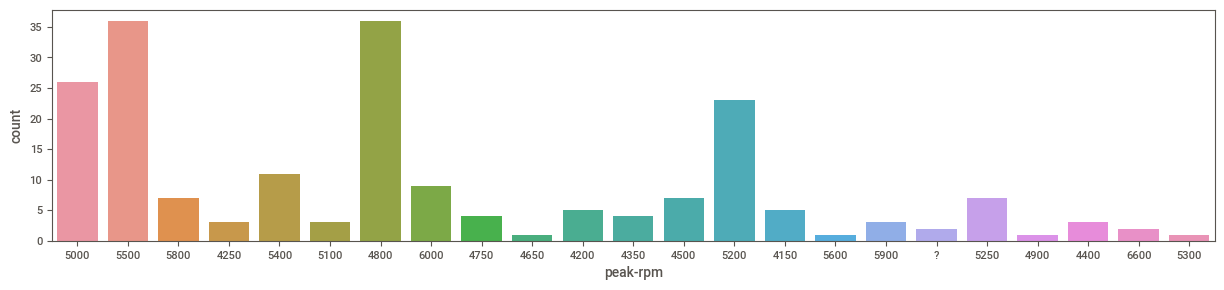

In [ ]:
plt.figure(figsize=(15,3))
sns.countplot(data=data,x='peak-rpm')

peak-rpm : Many automobiles are using 4800,5000,5200,5500 rpm.

## Bivariate Analysis

In [ ]:
cate_col1=['make','fuel-type','aspiration','num-of-doors']  # categorical columns

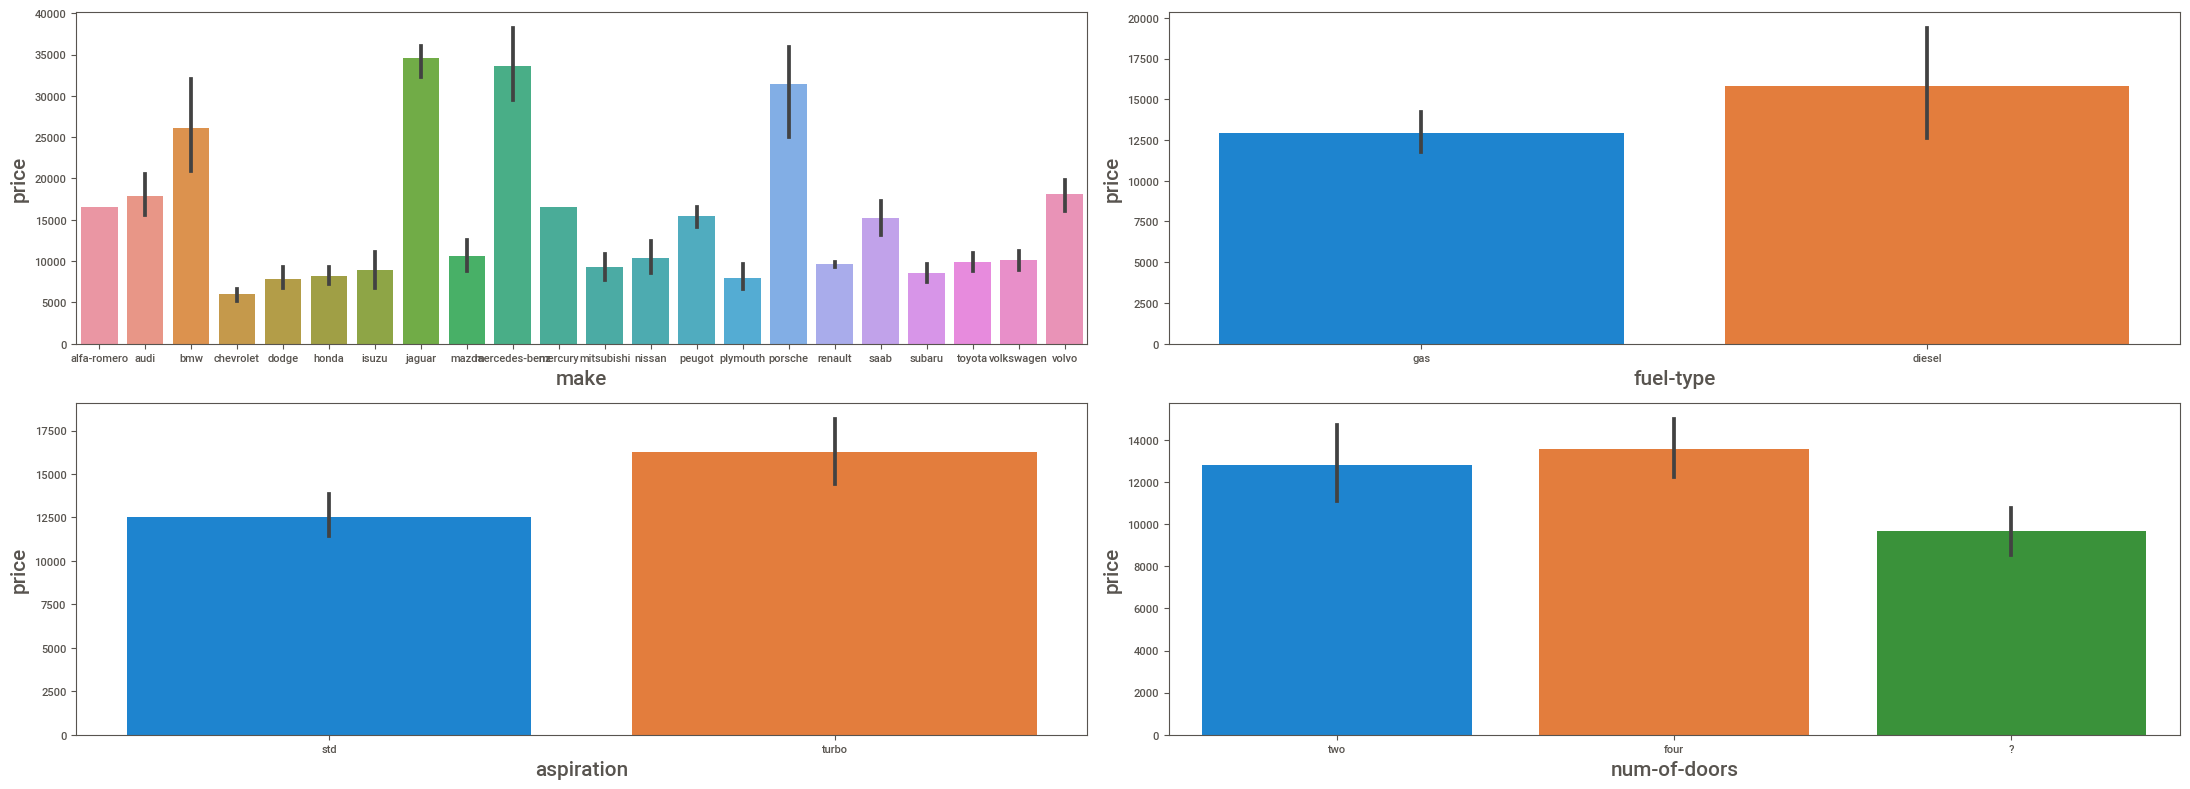

In [ ]:
plt.figure(figsize=(22,8),facecolor='white')
plotnum=1
for column in cate_col1:
  if plotnum<=4:
    ax=plt.subplot(2,2,plotnum)
    sns.barplot(x=column,y='price',data=data)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('price',fontsize=15)
  plotnum+=1
plt.tight_layout()

## Insights

*  jaguar,mercedes-benz,porsche brand automobile price is above 30000 dollar.bmw price is above 25000 dollar.audi,alfa-romero,mercury,saab and volvo price is above 15000 dollar.
*  The price of automobiles which are using diesel fuel is more than those which are using gas i.e above 15000 dollar.

*  The price of automobiles using turbo is more than automobiles using std aspiration i.e above 15000 dollar
*  There is little variation of the price of automobiles using four door and two door.Both have the price above 12000 dollar.





In [ ]:
cate_col2=['body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']    # categorical columns

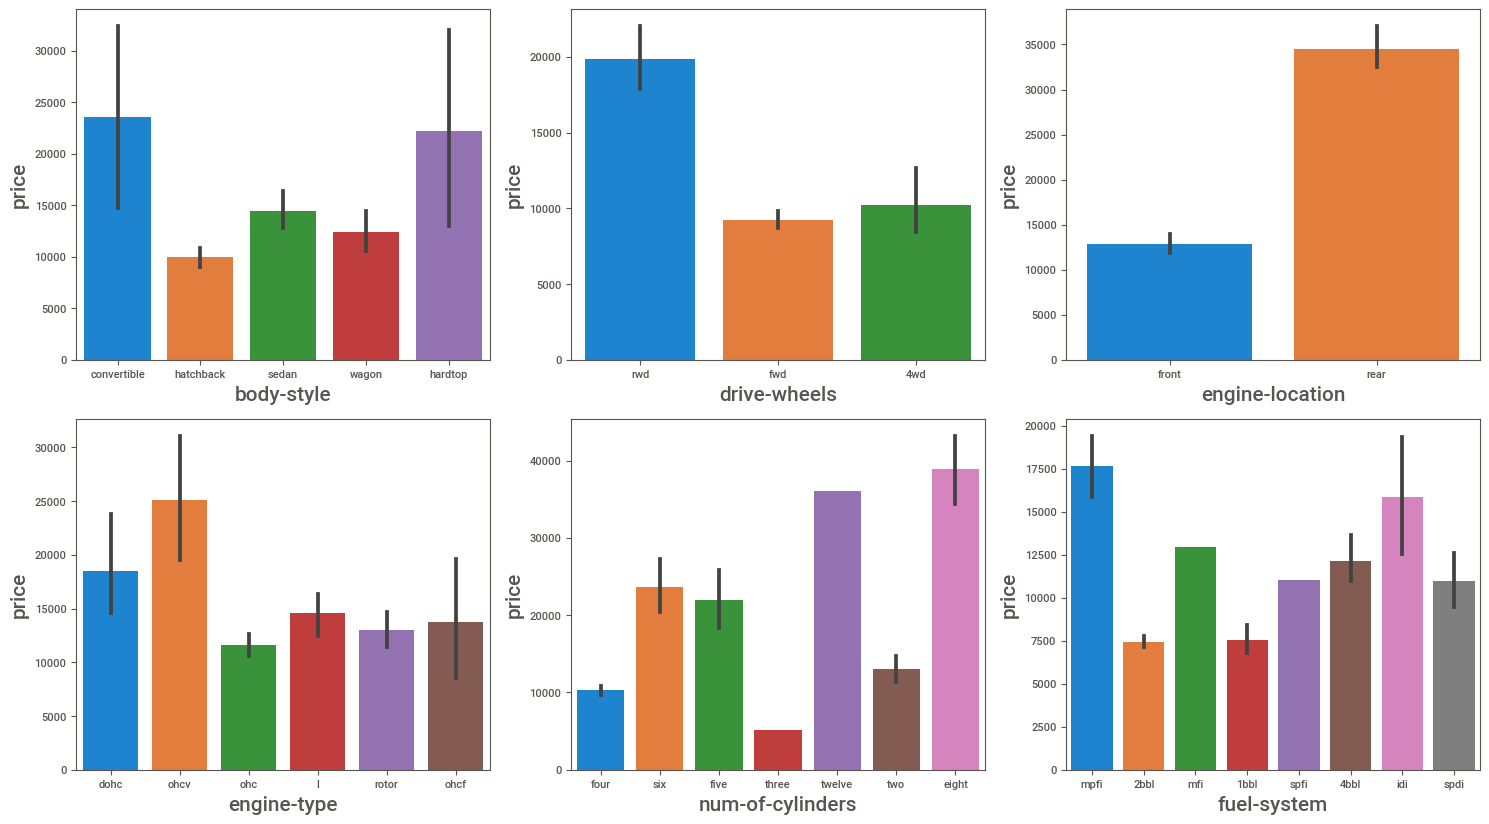

In [ ]:
plt.figure(figsize=(15,12),facecolor='white')
plotnum=1
for column in cate_col2:
  if plotnum<=6:
    ax=plt.subplot(3,3,plotnum)
    sns.barplot(x=column,y='price',data=data)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('price',fontsize=15)
  plotnum+=1
plt.tight_layout()

## Insights

* Those automobiles which are using convertible and hardtop body-style,the price of those automobiles is nearly 23000 dollar.The price of sedan body style is nearly 15000 dollar.The price of wagon body style is above 10000 dollar and hatchback body style is nearly 10000 dollar.
* The price of rwd drive-wheels automobile is nearly 20000 dollar.fwd drive wheel price is nearly 10000 dollar.4wd drive wheel price is slightly more than 10000 dollar.

*  The price of rear engine location is nearly 35000 dollar.The price of front engine location is nearly 13000 dollar.
*  The price of ohcv engine-type is highest that is 25000 dollar.Second highest price is dohc engine type which is 18000 dollar.

*  The price of automobiles which are using eight cylinders is the highest i.e 38000 dollar.The second highest price is, which are using 12 cylinders.In the third position six cylinder automobiles are there.
* The price of mpfi fuel system is 17500 dollar.idi fuel system price is nearly 16000 dollar.mfi fuel system is 12500 dollar.Price of 4bbl fuel system is nearly 12500 dollar.The price of spfi and spdi fuel system is nearly same i.e nearly 11000 dollar.







In [ ]:
# numerical columns
nume_col=['symbolic','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway']

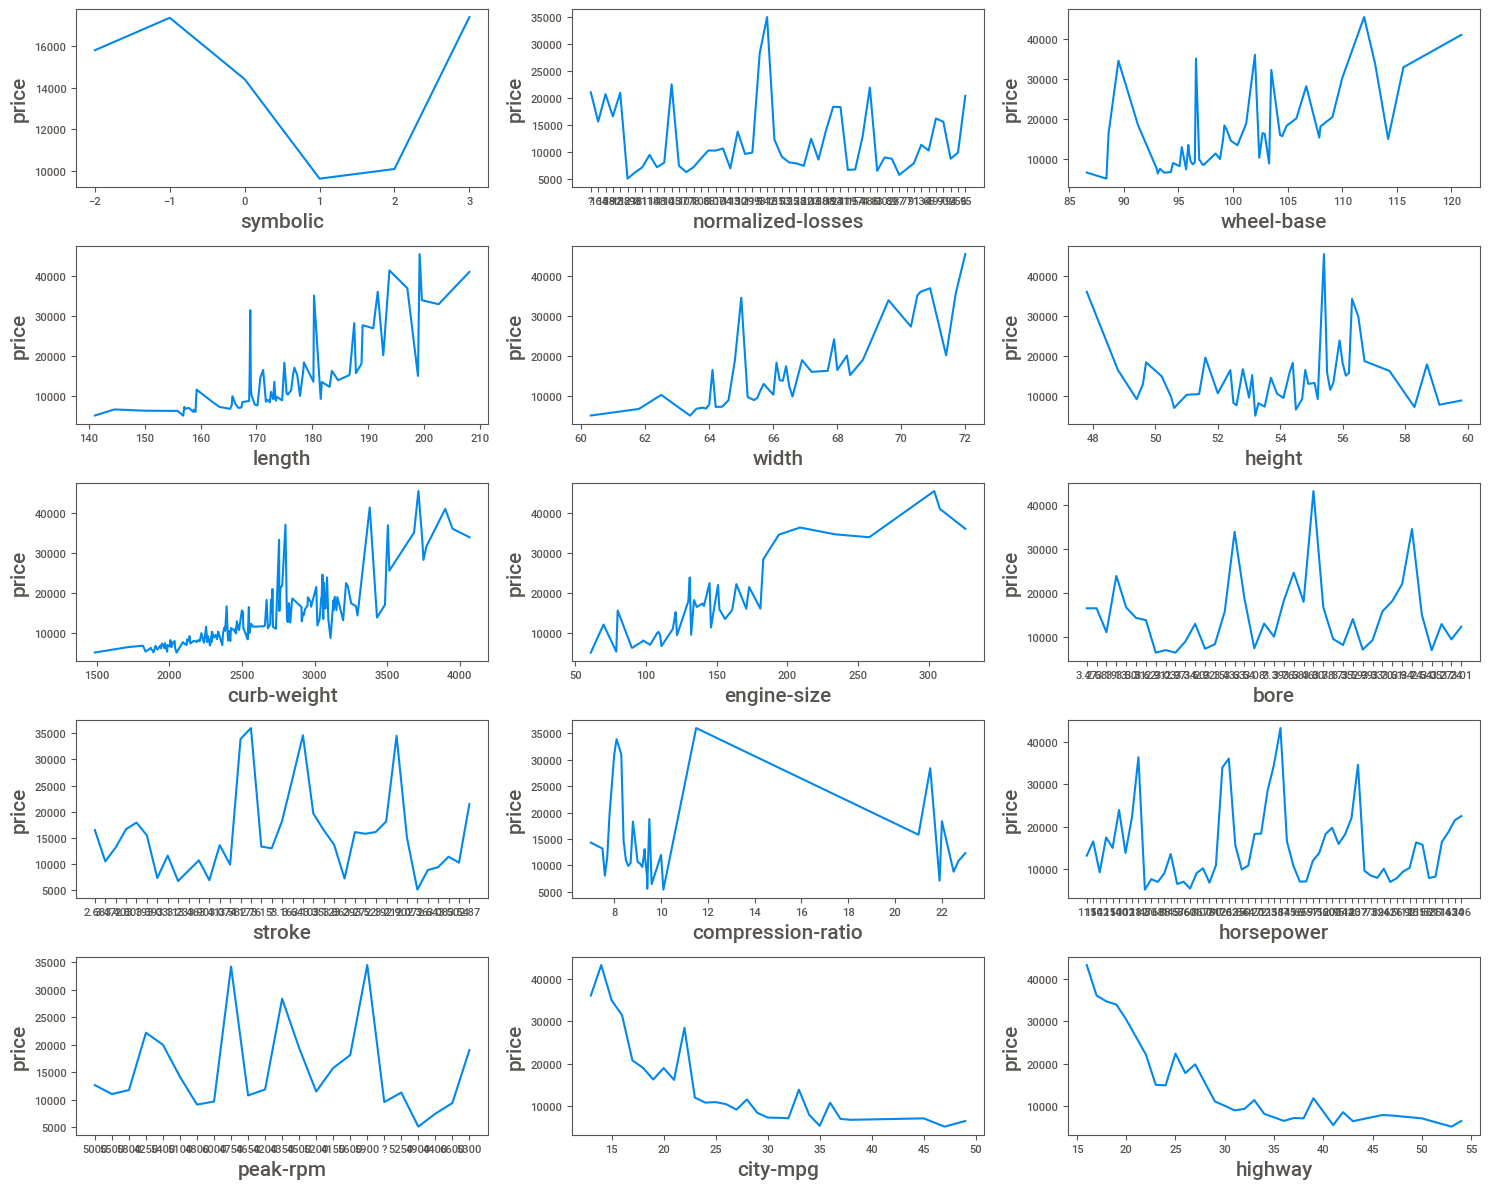

In [ ]:
plt.figure(figsize=(15,12),facecolor='white')
plotnum=1
for column in nume_col:
  if plotnum<=15:
    ax=plt.subplot(5,3,plotnum)
    sns.lineplot(x=column,y='price',data=data,ci=None)
    plt.xlabel(column,fontsize=15)
    plt.ylabel('price',fontsize=15)
  plotnum+=1
plt.tight_layout()

## Insights

*  When length is increasing,the price of automobile is also increasing.
*  Width is also directly propertional to price means if width is increasing,price is also increasing.

*  There is positive trend of curb-weight and price,engine size and price.
*  There is negative trend of city-mpg and price,highway and price means if city-mpg and highway is increasing,price is decreasing.





## Multivariate Analysis

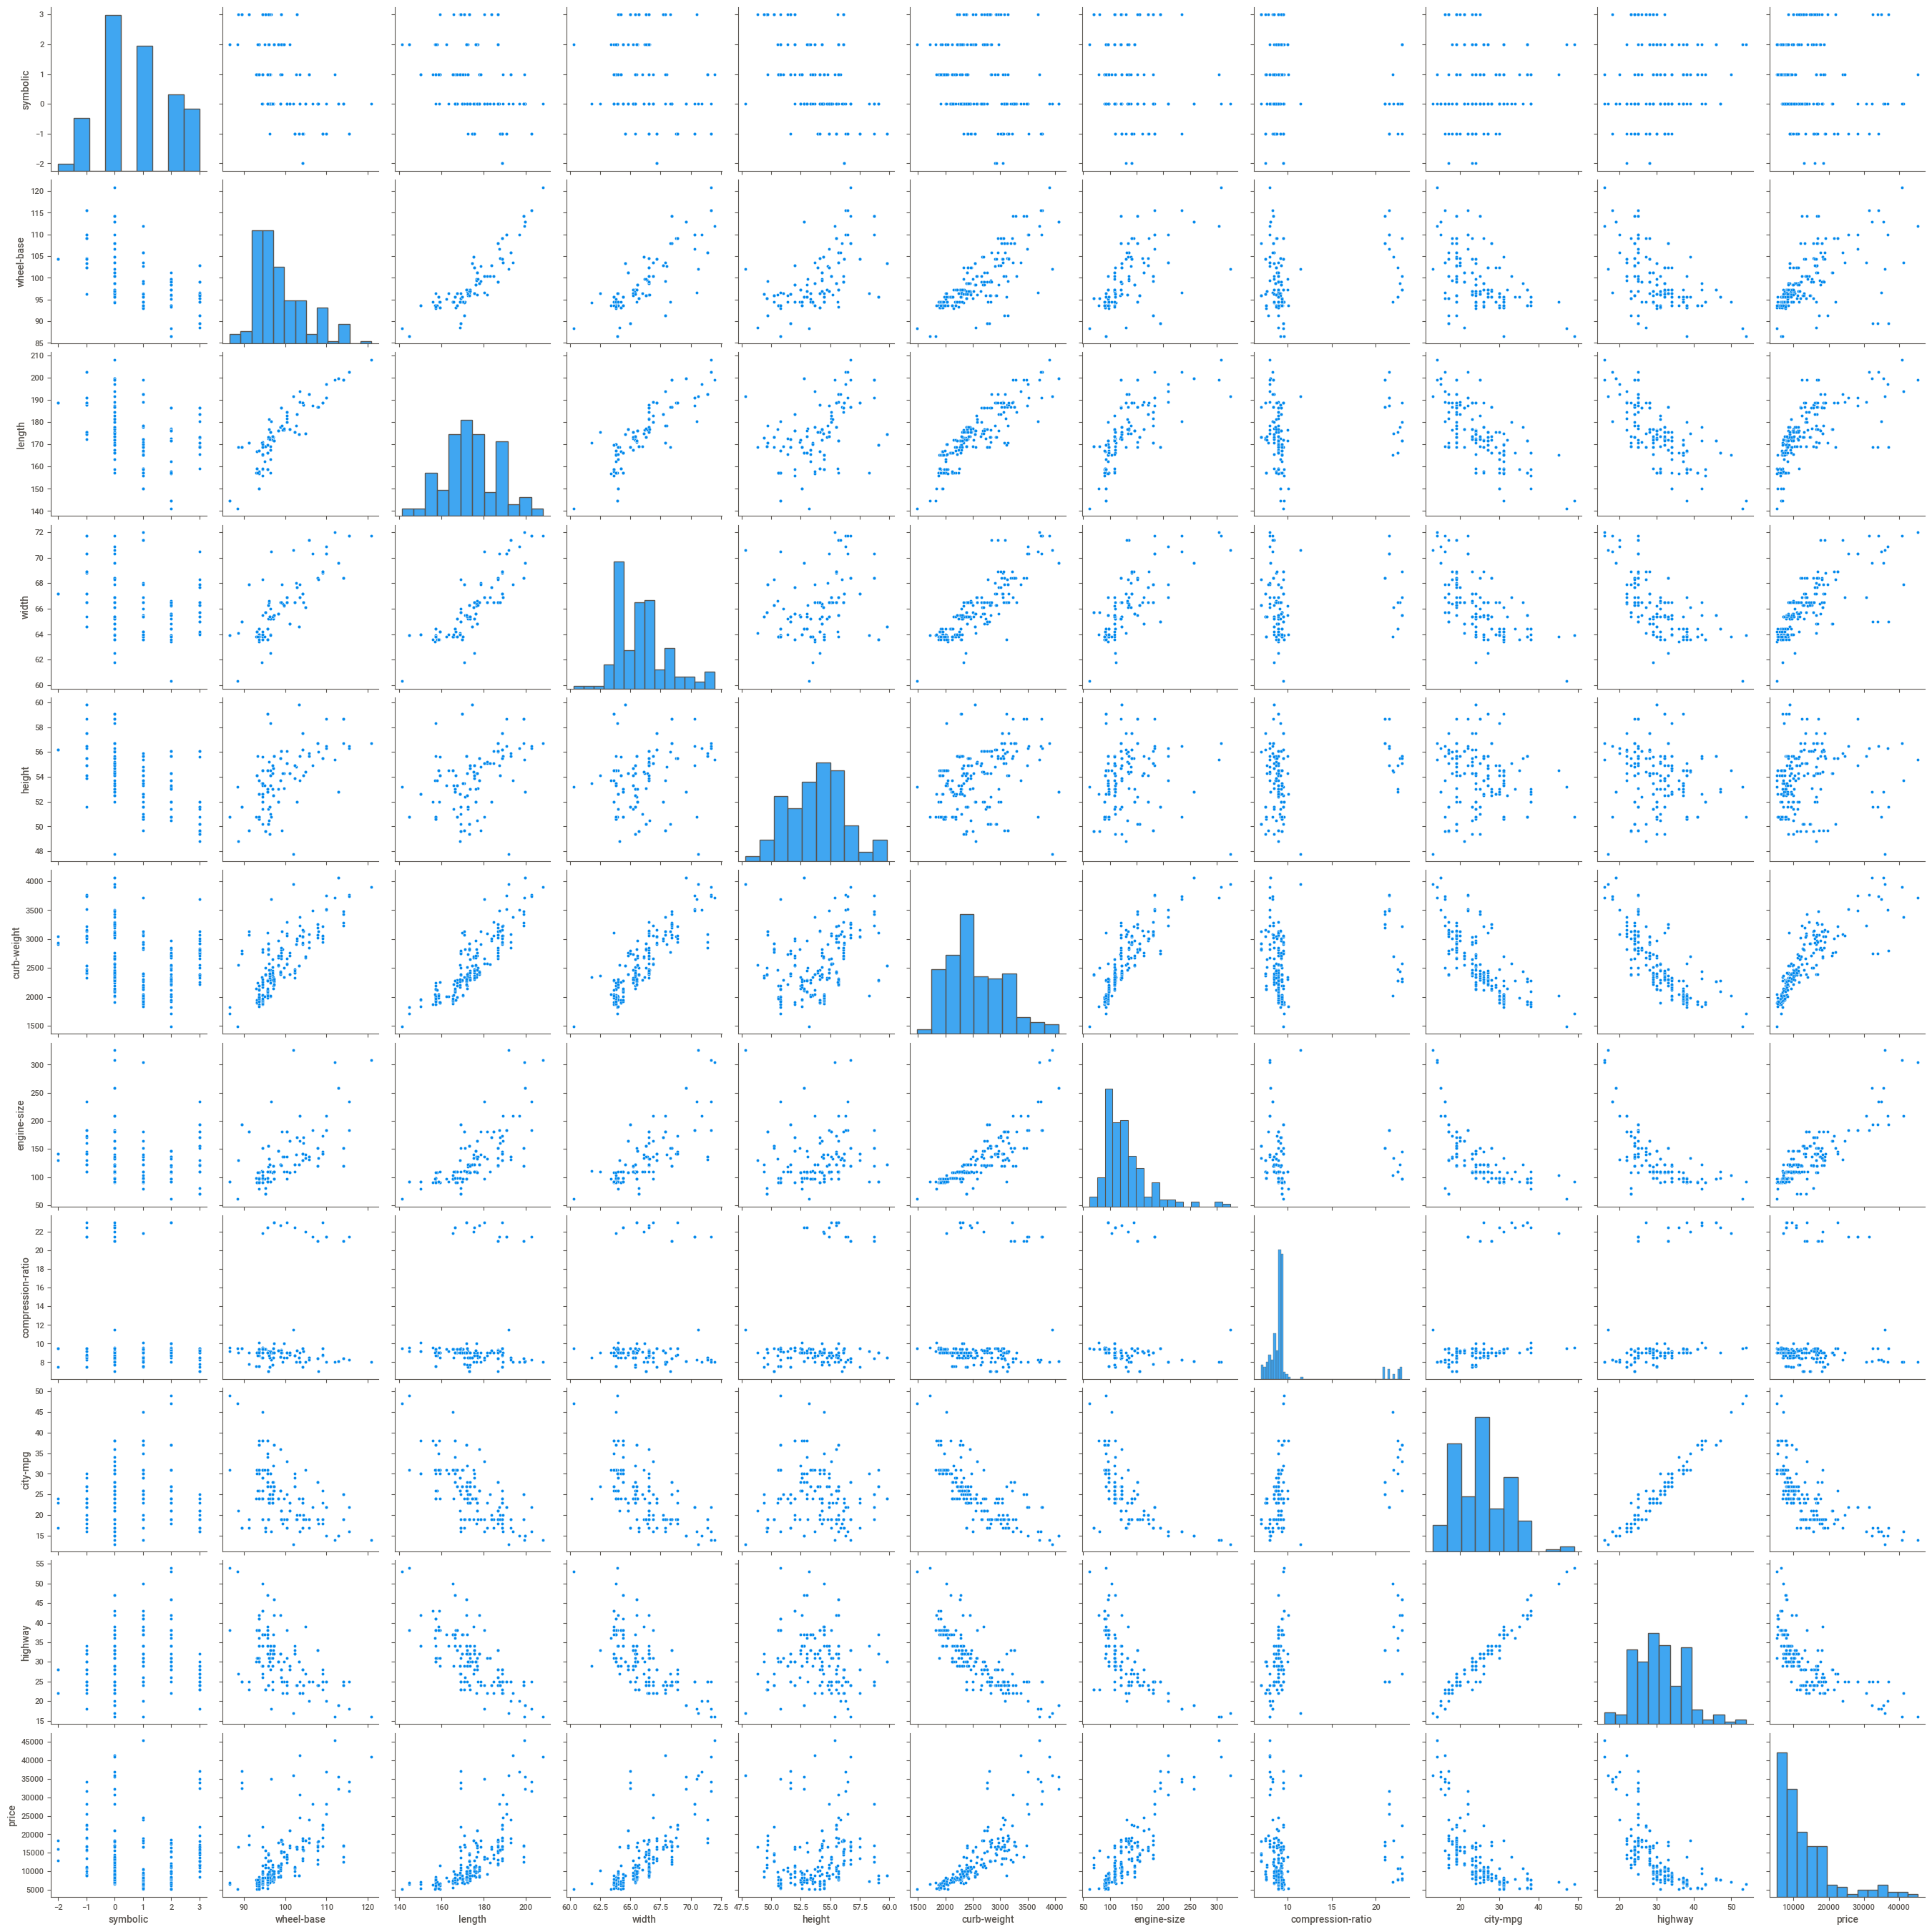

In [ ]:
sns.pairplot(data=data)

# Data Preprocessing

In [ ]:
# Checking missing values/null values
data.isnull().sum()

symbolic             0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway              0
price                0
dtype: int64

In [ ]:
# check duplicate values
data.duplicated().sum()

0

In [ ]:
# numerical columns
data1=data.select_dtypes(include=['int32','int64','float32','float64'])
data1.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
1,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500


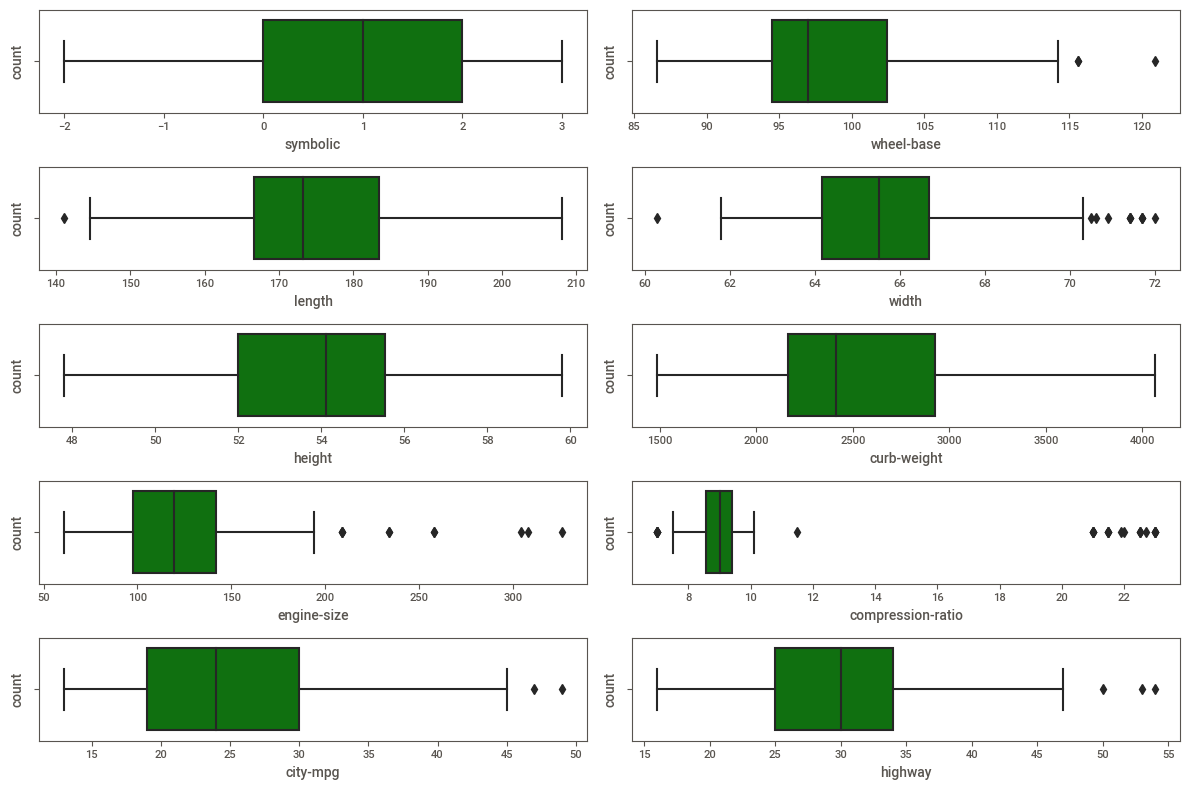

In [ ]:
# check ouliers
plt.figure(figsize=(12,8),facecolor='white')
plotnum=1
for column in data1.drop('price',axis=1):
  if plotnum<=10:
    ax=plt.subplot(5,2,plotnum)
    sns.boxplot(x=data1[column],data=data,color="green")
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnum+=1
plt.tight_layout()

In these type of situation,there is no need to handle outliers.

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
df=['price']
scal=scaling.fit_transform(data1.drop(df,axis=1))
print(scal)

[[1.         0.05830904 0.41343284 ... 0.125      0.22222222 0.28947368]
 [0.6        0.2303207  0.44925373 ... 0.125      0.16666667 0.26315789]
 [0.8        0.38483965 0.52985075 ... 0.1875     0.30555556 0.36842105]
 ...
 [0.2        0.65597668 0.7119403  ... 0.1125     0.13888889 0.18421053]
 [0.2        0.65597668 0.7119403  ... 1.         0.36111111 0.28947368]
 [0.2        0.65597668 0.7119403  ... 0.15625    0.16666667 0.23684211]]


In [ ]:
scal_data=pd.DataFrame(scal,columns=['symbolic','wheel-base','length','width','height','curb-weight','engine-size','compression-ratio','city-mpg','highway'])

In [ ]:
df1=data1[['price']]
new_data=pd.concat([scal_data,df1],axis=1)
new_data.head()

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.12500,0.222222,0.289474,16500
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.12500,0.166667,0.263158,16500
2,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.18750,0.305556,0.368421,13950
3,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.06250,0.138889,0.157895,17450
4,0.8,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.09375,0.166667,0.236842,15250


In [ ]:
data2=data.select_dtypes(include='O')    # Select categorical columns
data2.head(2)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data3=pd.concat([new_data,data2],axis=1)    # concat both numerical and categorical columns
data3.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4=data3.copy()   # copy the data
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
# converting categorical value to numerical value
data4.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64

In [ ]:
## Manual encoding of 'make' feature
data4.make=data4.make.map({'mercury':0,'alfa-romero':1,'renault':2,'isuzu':3,'chevrolet':4,'jaguar':5,'porsche':6,'saab':7,'audi':8,'plymouth':9,'bmw':10,'mercedes-benz':11,'dodge':12,'volvo':13,'peugot':14,'subaru':15,'volkswagen':16,'honda':17,'mitsubishi':18,'mazda':19,'nissan':20,'toyota':21})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['fuel-type'].value_counts()

gas       180
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
# Manual encoding  of fuel-type feature
data4['fuel-type'] = data4['fuel-type'].map({'diesel':0,'gas':1})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['aspiration'].value_counts()

std      164
turbo     36
Name: aspiration, dtype: int64

In [ ]:
data4['aspiration'] = data4['aspiration'].map({'turbo':0,'std':1})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['num-of-doors'].value_counts()

four    113
two      85
?         2
Name: num-of-doors, dtype: int64

In [ ]:
data4['num-of-doors'] = data4['num-of-doors'].map({'?':0,'two':1,'four':2})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: body-style, dtype: int64

In [ ]:
data4['body-style']=data4['body-style'].map({'convertible':0,'hardtop':1,'wagon':2,'hatchback':3,'sedan':4})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,0,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,3,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['drive-wheels'].value_counts()

fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
data4['drive-wheels'] = data4['drive-wheels'].map({'4wd':0,'rwd':1,'fwd':2})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,0,1,front,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,3,1,front,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['engine-location'].value_counts()

front    197
rear       3
Name: engine-location, dtype: int64

In [ ]:
data4['engine-location'] = data4['engine-location'].map({'rear':0,'front':1})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,0,1,1,dohc,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,3,1,1,ohcv,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['engine-type'].value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: engine-type, dtype: int64

In [ ]:
data4['engine-type'] = data4['engine-type'].map({'rotor':0,'dohc':1,'l':2,'ohcv':3,'ohcf':4,'ohc':5})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,0,1,1,1,four,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,3,1,1,3,six,mpfi,2.68,3.47,154,5000


In [ ]:
data4['num-of-cylinders'].value_counts()

four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [ ]:
data4['num-of-cylinders'] = data4['num-of-cylinders'].map({'twelve':0,'three':1,'eight':2,'two':3,'five':4,'six':5,'four':6})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,0,1,1,1,6,mpfi,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,3,1,1,3,5,mpfi,2.68,3.47,154,5000


In [ ]:
data4['fuel-system'].value_counts()

mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [ ]:
data4['fuel-system'] = data4['fuel-system'].map({'spfi':0,'mfi':1,'4bbl':2,'spdi':3,'1bbl':4,'idi':5,'2bbl':6,'mpfi':7})
data4.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,0,1,1,1,6,7,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,3,1,1,3,5,7,2.68,3.47,154,5000


In [ ]:
data5=data4.copy()
data5.head(2)

,symbolic,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway,price,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.125,0.222222,0.289474,16500,?,1,1,1,1,0,1,1,1,6,7,3.47,2.68,111,5000
1,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.125,0.166667,0.263158,16500,?,1,1,1,1,3,1,1,3,5,7,2.68,3.47,154,5000


# Feature Scaling

<Axes: >

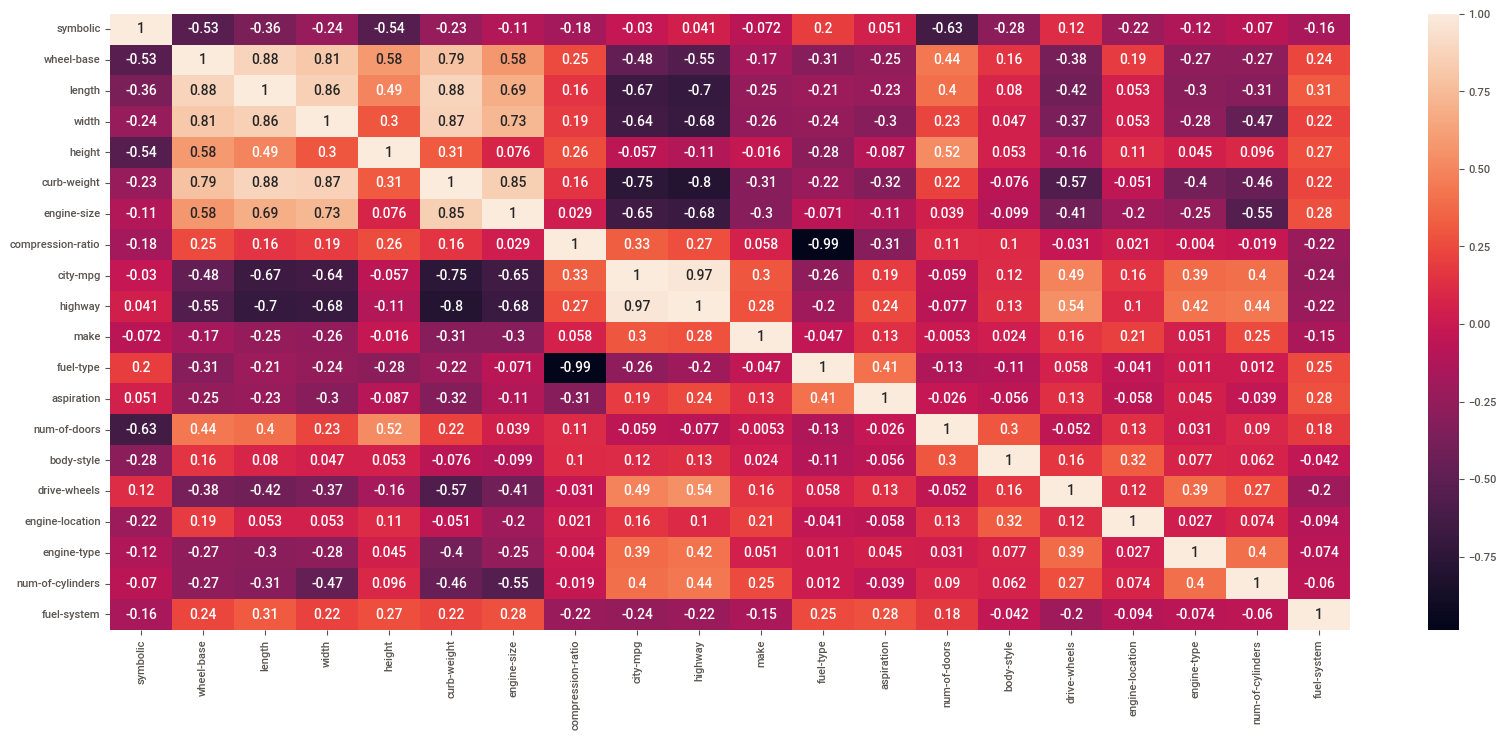

In [ ]:
# check for multicollinearity
plt.figure(figsize=(20,8))
data5.corr()
sns.heatmap(data5.drop('price',axis=1).corr(),annot=True)

# Model Creation

## Linear Regression

In [ ]:
# split data into x and y
x=data5.drop('price',axis=1)
y=data5['price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
x_train.shape

(140, 25)

In [ ]:
x_test.shape

(60, 25)

In [ ]:
x_train = x_train.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(x_train.head())

     symbolic  wheel-base    length     width    height  curb-weight  \
77        1.0    0.282799  0.476119  0.435897  0.133333     0.325834   
127       1.0    0.364431  0.679104  0.529915  0.691667     0.453840   
5         0.6    0.559767  0.770149  0.948718  0.658333     0.525989   
118       0.6    0.206997  0.391045  0.299145  0.250000     0.272692   
113       0.4    0.623907  0.680597  0.683761  0.683333     0.636928   

     engine-size  compression-ratio  city-mpg   highway  normalized-losses  \
77      0.230189           0.093750  0.333333  0.421053              153.0   
127     0.226415           0.144375  0.222222  0.315789              150.0   
5       0.283019           0.093750  0.166667  0.236842              158.0   
118     0.139623           0.150000  0.500000  0.578947              154.0   
113     0.275472           0.000000  0.138889  0.210526              161.0   

     make  fuel-type  aspiration  num-of-doors  body-style  drive-wheels  \
77   18.0        1.0  

In [ ]:
## import linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# initialise the model
model1=LinearRegression()

In [ ]:
# train model with x_train and y_train
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_test = x_test.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
# make predictions / test model
y_pred=model1.predict(x_test)
y_pred

array([18419.98722943, 20241.27256499, 13672.52108401, 20222.57538781,
       20574.03923946, 12787.03576314,  5466.93397433,  9896.37274798,
        5533.87732407,  9948.78100899, 15485.17147678, 18715.03436173,
       16893.47272908, 32553.51564418,  7460.63533375, 10354.0794884 ,
        7237.27664586,  8864.79323423, 10607.44224536, 10549.49133157,
        8992.44804957, 21031.43673484,  5839.27625087,  7576.45110043,
        5746.7683506 , 32559.23497104, 16826.29473082, 21588.43113885,
       28468.26558899, 17336.38085265, 13271.49859493,  9608.82618383,
       12746.8313111 , 54795.04110213,  6670.03834603, 11665.66937709,
       19955.95252275, 10626.76131258,  9308.64314841, 21019.66252237,
       10848.20715532,  6319.75181846,  9201.01142609,  5930.68561104,
       17092.4430378 ,  5599.22707377,  5755.31055078,  7565.52568443,
       19461.96100678, 44100.57765602, 15868.8778014 ,  9869.19089505,
       14098.32439119,  6959.12922886, 10972.83996765, 11450.54277529,
      

In [ ]:
# slopes/coefficient of x
model1.coef_

array([-6.09421241e+02,  5.36859435e+03, -1.45913993e+03,  4.57263314e+03,
        1.94958181e+02,  4.40435842e+03,  2.26261156e+04, -1.62196943e+03,
       -8.57751946e+03,  1.45951492e+04, -9.48882684e+00, -1.61734561e+02,
       -3.39458924e+03, -2.07172555e+02,  3.22201092e+01,  6.94520348e+01,
       -1.23065438e+03, -5.44038369e+03,  3.54250427e+02, -2.18952751e+03,
       -2.82727702e+01, -9.33922819e+02, -2.59085441e+03,  5.13473868e+01,
        1.77282271e+00])

In [ ]:
# intercept
model1.intercept_

22130.314895700976

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
## MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

17115055.01257844

In [ ]:
## MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

2869.129368135875

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   # linear regression r2_score

0.7744225006511831

In [ ]:
adj_r2=1-(1-0.7744)*(402-1)/(402-6-1)
adj_r2

0.770973164556962

In [ ]:
# do the prediction after entering values such as symbolic=0.8,wheel-base=0.082654,length=0.442488,width=0.245684,height=0.541666,curb-weight=0.412535,engine-size=0.181122,compression-ratio=0.12500,city-mpg=0.157895,highway=0.25856,normalized-losses=164.0,make=1,fuel-type1,aspiration=1,num-of-doors=2,body-style=4,drive-wheels=2,engine-location=1,engine-type=5,num-of-cylinders=4,fuel-system=7,bore=2.58,stroke=3.80,horsepower=222,peak-rpm=5500
model1.predict([[0.8,0.082654,0.442488,0.245684,0.541666,0.412535,0.181122,0.12500,0.157895,0.25856,164.0,1,1,1,2,4,2,1,5,4,7,2.58,3.80,222,5500]])

array([19632.55607404])

# KNN

In [ ]:
# split data into x and y
x=data5.drop('price',axis=1)
y=data5['price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
x_train = x_train.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
x_test = x_test.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
## MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

26351608.179166667

In [ ]:
## MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

3395.991666666667

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.6526841501527423

In [ ]:
# how to select k value
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsRegressor(n_neighbors=k)
  KNN.fit(x_train,y_train)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))

In [ ]:
error_rate

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0.5, 1.0, 'k v/s error')

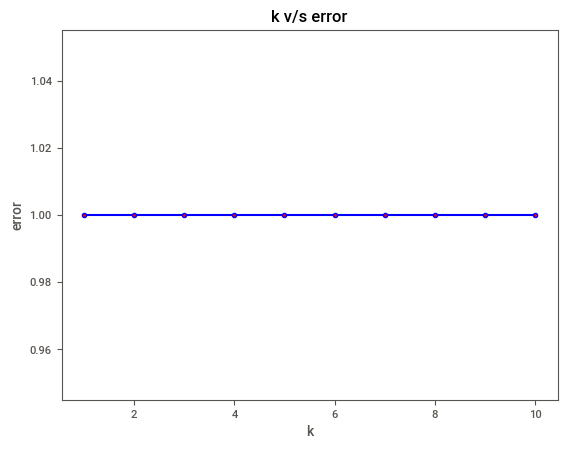

In [ ]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

42561086.333333336

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

3930.825

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)     # KNN r2_score

0.43904221063931914

In [ ]:
#do the prediction after entering values such as symbolic=0.8,wheel-base=0.082654,length=0.442488,width=0.245684,height=0.541666,curb-weight=0.412535,engine-size=0.181122,compression-ratio=0.12500,city-mpg=0.157895,highway=0.25856,normalized-losses=164.0,make=1,fuel-type1,aspiration=1,num-of-doors=2,body-style=4,drive-wheels=2,engine-location=1,engine-type=5,num-of-cylinders=4,fuel-system=7,bore=2.58,stroke=3.80,horsepower=222,peak-rpm=5500
KNN.predict([[0.8,0.082654,0.442488,0.245684,0.541666,0.412535,0.181122,0.12500,0.157895,0.25856,164.0,1,1,1,2,4,2,1,5,4,7,2.58,3.80,222,5500]])

array([20665.75])

# Decision Tree

In [ ]:
# Split data into x and y
x=data5.drop('price',axis=1)
y=data5['price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train = x_train.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
x_test = x_test.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import the algorithm
model2=DecisionTreeRegressor()     # initialise the model
model2.fit(x_train,y_train)        #train the model
y_pred=model2.predict(x_test)      # Predictions -- x_test

In [ ]:
y_train_predict=model2.predict(x_train)

In [ ]:
y_train_predict

array([10698., 13499.,  6529., 24565.,  7895.,  8921., 11048., 12940.,
        7299.,  7126., 11395., 11850.,  8449.,  6785.,  7609., 18150.,
        8921.,  9233., 17199., 16630., 13950.,  8499.,  5195., 13845.,
       15985.,  5499.,  9538.,  9095., 13415., 18280.,  6229.,  7463.,
       19699.,  7295., 21105., 18950.,  8238., 18920., 12964., 12764.,
       15250.,  7129., 10198.,  5348., 16695., 11694., 20970., 18344.,
       17425.,  6338., 11549., 16500., 22470.,  7898., 45400., 34028.,
       28248., 35550.,  9639.,  6479., 10345., 17425.,  7738.,  8358.,
        8558.,  6692., 11595.,  6488.,  6989., 12945.,  8948.,  6095.,
        8249.,  7788., 32250.,  9960., 17450., 12440., 13645.,  5118.,
        8195.,  7975.,  9980.,  6695., 14489.,  7295., 23875., 17075.,
        7799.,  9279., 15750.,  8495.,  7349., 16430., 30760., 10795.,
       10898., 18150.,  6295.,  5389., 15690.,  7053., 17669.,  9995.,
       25552., 15645., 15580.,  7395., 19045., 10245.,  6795.,  6849.,
      

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

14147173.233333332

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

2307.866666666667

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_predict)   #training score

0.9998664219695718

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   #testing score

0.843776840599793

Here training score is good but testing score is bad.So it results overfitting.To overcome this,we are using hyper parameter tuning in decision tree.

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":('mse', 'friedman_mse', 'mae'),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:
# Applying the Grid Search CV

dtc = DecisionTreeRegressor()
model3= GridSearchCV(dtc, params, scoring='neg_mean_squared_error', cv=5)
model3.fit(x_train,y_train)
best_params = model3.best_params_
print(model3.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 18, 'min_samples_leaf': 4, 'min_samples_split': 3, 'splitter': 'best'}


In [ ]:
dtc1 = DecisionTreeRegressor(criterion='friedman_mse',max_depth= 18, min_samples_leaf= 4, min_samples_split= 3, splitter='best')
dtc1.fit(x_train,y_train)
y_predict=dtc1.predict(x_test)

In [ ]:
y_train_pred = dtc1.predict(x_train)

In [ ]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  7858508.967712774


In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  2502119.8157482995


In [ ]:
mean_absolute_error(y_test,y_predict)

2001.9503968253969

In [ ]:
mean_absolute_error(y_train,y_train_pred)

1049.7050000000002

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_predict)   #training score

0.9998664219695718

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_predict)   #testing score

0.9132207488476703

After applying hyper parameter tuning, we can clearly see better testing score as compared to the previous score

In [ ]:
# do the prediction after entering values such as symbolic=0.8,wheel-base=0.082654,length=0.442488,width=0.245684,height=0.541666,curb-weight=0.412535,engine-size=0.181122,compression-ratio=0.12500,city-mpg=0.157895,highway=0.25856,normalized-losses=164.0,make=1,fuel-type1,aspiration=1,num-of-doors=2,body-style=4,drive-wheels=2,engine-location=1,engine-type=5,num-of-cylinders=4,fuel-system=7,bore=2.58,stroke=3.80,horsepower=222,peak-rpm=5500
model3.predict([[0.8,0.082654,0.442488,0.245684,0.541666,0.412535,0.181122,0.12500,0.157895,0.25856,164.0,1,1,1,2,4,2,1,5,4,7,2.58,3.80,222,5500]])

array([12183.])

## Random Forest

In [ ]:
# Split data into x and y
x=data5.drop('price',axis=1)
y=data5['price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train = x_train.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
x_test = x_test.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor()
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)

In [ ]:
y_train_pred=model4.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_train,y_train_pred)
MSE

719462.53687875

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3473294.496580417

In [ ]:
MAE=mean_absolute_error(y_train,y_train_pred)
MAE

574.8076785714287

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1420.7227500000004

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_pred)   #training score

0.9859298149960325

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   #testing score

0.9616454092394473

Here also training score is more as compared to the testing score and results overfitting.To solve this problem we are applying hyper parameter tuning technique.

In [ ]:
#hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(10, 200, 10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [int(x) for x in np.linspace(10, 110, 11)],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
x_train = x_train.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
x_test = x_test.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
rf_cv = RandomizedSearchCV(estimator=model4, param_distributions=param_dist, n_iter=10,
                            scoring='neg_mean_squared_error', cv=5, random_state=42, error_score='raise')
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(max_depth=90,
                                                   max_features='auto',
                                                   n_estimators=200),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters and corresponding MSE score
print("Best Parameters: ", rf_cv.best_params_)
print("Best Negative Mean Squared Error: ", rf_cv.best_score_)


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90}
Best Negative Mean Squared Error:  -4919029.076485281


In [ ]:
model4 = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf= 1, max_features='auto',max_depth= 90)
model4.fit(x_train,y_train)
y_predict=dtc1.predict(x_test)

In [ ]:
y_train_pred = model4.predict(x_train)

In [ ]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  4527390.527099915


In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  714769.7248884853


In [ ]:
mean_absolute_error(y_test,y_predict)

1591.9656547619047

In [ ]:
mean_absolute_error(y_train,y_train_pred)

567.0070468749999

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_pred)   #training score

0.9868225865035589

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_predict)   #testing score

0.9450017536233755

Though testing score and traing score are nearly same,when we are applying hyper parameter tuning.The result is good as compared to the previous score.

In [ ]:
#do the prediction after entering values such as symbolic=0.8,wheel-base=0.082654,length=0.442488,width=0.245684,height=0.541666,curb-weight=0.412535,engine-size=0.181122,compression-ratio=0.12500,city-mpg=0.157895,highway=0.25856,normalized-losses=164.0,make=1,fuel-type1,aspiration=1,num-of-doors=2,body-style=4,drive-wheels=2,engine-location=1,engine-type=5,num-of-cylinders=4,fuel-system=7,bore=2.58,stroke=3.80,horsepower=222,peak-rpm=5500
rf_cv.predict([[0.8,0.082654,0.442488,0.245684,0.541666,0.412535,0.181122,0.12500,0.157895,0.25856,164.0,1,1,1,2,4,2,1,5,4,7,2.58,3.80,222,5500]])

array([14329.17])

# Boosting

## Gradient Boosting

In [ ]:
# Split data into x and y
x=data5.drop('price',axis=1)
y=data5['price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
x_train = x_train.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
x_test = x_test.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
## Model Building
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

6102268.348609667

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1675.3534923538064

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.9195717201362694

In [ ]:
#do the prediction after entering values such as symbolic=0.8,wheel-base=0.082654,length=0.442488,width=0.245684,height=0.541666,curb-weight=0.412535,engine-size=0.181122,compression-ratio=0.12500,city-mpg=0.157895,highway=0.25856,normalized-losses=164.0,make=1,fuel-type1,aspiration=1,num-of-doors=2,body-style=4,drive-wheels=2,engine-location=1,engine-type=5,num-of-cylinders=4,fuel-system=7,bore=2.58,stroke=3.80,horsepower=222,peak-rpm=5500
gb.predict([[0.8,0.082654,0.442488,0.245684,0.541666,0.412535,0.181122,0.12500,0.157895,0.25856,164.0,1,1,1,2,4,2,1,5,4,7,2.58,3.80,222,5500]])

array([17491.41092657])

## XG Boost

In [ ]:
# Split data into x and y
x=data5.drop('price',axis=1)
y=data5['price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
!pip install xgboost

In [ ]:
x_train = x_train.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_train.fillna(x_train.mean(), inplace=True)

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
x_test = x_test.replace('?', np.nan).astype(float)  # Convert '?' to NaN
x_test.fillna(x_test.mean(), inplace=True)

In [ ]:
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [ ]:
from xgboost import XGBRegressor
model5=XGBRegressor()
model5.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model5.predict(x_test)

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

6300624.682788118

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1627.8266438802084

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.9169573712013062

In [ ]:
# applying hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid={'gamma':[0.01,0.2,0.4,0.8,0.1,2,101.2,42.5],
           'learning_rate':[0.01,0.02,0.04,0.18,0.28],
           'max_depth':[4,8,5,6,9,12,15,20,22,24],
           'n_estimators':[25,56,45,89,125,250,450,280],
           'reg_alpha':[0,0.1,0.4,0.2,0.6,0.8,12.5,8.5],
           'reg_lambda':[0,0.1,0.2,0.4,0.8,1.8,6.5,8.25,4.8]}

In [ ]:
XGB=XGBRegressor(random_state=4,verbosity=0)

In [ ]:
rcv=RandomizedSearchCV(estimator=XGB,scoring='r2',param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=4, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.01, 0.2, 0.4, 0.8, 0.1, 2,
                                                  101.2, 42.5],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.18, 0.28],
                                        'max_depth': [4, 8, 5, 6, 9, 12, 15, 20,
                                                      22, 24],
                                        'n_estimators': [25, 56, 45, 89, 125,
                                                         250, 450, 280],
                                        'reg_alpha': [0, 0.1, 0.4, 0.2, 0.6,
                                                      0.8, 12.5, 8.5],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.8, 6.5, 8.25, 4.8]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
cv_best_params=rcv.best_params_
print(f'best parameters:{cv_best_params}')

best parameters:{'reg_lambda': 0, 'reg_alpha': 0.2, 'n_estimators': 450, 'max_depth': 4, 'learning_rate': 0.04, 'gamma': 101.2}


In [ ]:
XGB_model=XGBRegressor(reg_lambda= 0, reg_alpha=0.2, n_estimators=450, max_depth=4, learning_rate=0.04, gamma=101.2)
XGB_model.fit(x_train,y_train)
y_predict=XGB_model.predict(x_test)

In [ ]:
y_train_pred=XGB_model.predict(x_train)

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

6300624.682788118

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1627.8266438802084

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.9169573712013062

In [ ]:
#do the prediction after entering values such as symbolic=0.8,wheel-base=0.082654,length=0.442488,width=0.245684,height=0.541666,curb-weight=0.412535,engine-size=0.181122,compression-ratio=0.12500,city-mpg=0.157895,highway=0.25856,normalized-losses=164.0,make=1,fuel-type1,aspiration=1,num-of-doors=2,body-style=4,drive-wheels=2,engine-location=1,engine-type=5,num-of-cylinders=4,fuel-system=7,bore=2.58,stroke=3.80,horsepower=222,peak-rpm=5500
rcv.predict([[0.8,0.082654,0.442488,0.245684,0.541666,0.412535,0.181122,0.12500,0.157895,0.25856,164.0,1,1,1,2,4,2,1,5,4,7,2.58,3.80,222,5500]])

array([16602.473], dtype=float32)

# Model Comparision
1. Linear Regression
r2_score-0.7744 i.e 77%

2. KNN
r2_score-0.4390 i.e 44%

3. Decision Tree

* Training r2_score-0.9998 i.e 100%

* Testing r2_score-0.8437 i.e 84%

After hyperparameter tuning

* Training r2_score-0.9998 i.e 100%

* Testing r2_score-0.9132 i.e 91%


4. Random Forest

* Training r2_score-0.9859 i.e 98%

* Testing r2_score-0.9616 i.e 96%

After hyperparameter tuning

*  Training r2_score-0.9868 i.e 98%

*  Testing r2_score-0.9450 i.e 94%

5. Boosting

a.Gradient Boosting

*  r2_score-0.9195

b. XGBoost

* r2_score-0.9169

After comparision,we conclude that random forest model is the best model.The score of this model is 96%.

# Report on Challenges faced

*  There was no column name to understand the dataset.
*  There was some question mark in maximum columns.

*  It was not mentioned the unit of measurement of some continues data.That is why in the analysis part,explaining the data was not that much proper.
*  There was many technical words which was little bit hard to understand.





# What technique used to solve the problem

*  We had to check the word document and replaced the column name accordingly.
*  We had to chenge ? mark to NaN,and then replace it to median but it was not working.It showed error in the model creation part.Then we had used chatgpt to find the proper code and handled the error.

*  To find the unit measurement,we had to search it in google.
*  To understand the technical words,we had to explore it in google.



